# EDA-Project 3

This is your third project from the second block of the Data Science course.
You are provided with the following file: ```"netflix_titles.csv"```.

Make an EDA according to the data.
List the questions you think are important. Then try to answer each question with a visualization. Please make your code clean and your arguments understandable.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!matplotlib inline
import seaborn as sns

'matplotlib' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
file_csv = [f for f in os.listdir()]
file_csv

['.ipynb_checkpoints',
 'eda-project-1.ipynb',
 'eda-project-2.ipynb',
 'eda-project-3.ipynb',
 'foreign_exchange_rates.csv',
 'houses_to_rent.csv',
 'netflix_titles.csv',
 'project1.zip',
 'project2.zip',
 'project3.zip']

In [3]:
netflix = pd.read_csv('netflix_titles.csv')

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Basic Description and Handling of Missing Values

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
netflix.duplicated().sum()

0

In [7]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

- 10 out of 12 has object data type
- Rows do not have duplicates
- the director column has 1969 na, cast - 570,country - 476, date_added - 11, release_year - 10 NA <br /> value - which in total gives a large share in the data (6234 lines in total) and is more likely to be replaced by 'unknown'
- We use categorical columns type, cast, country, to identify relationships and trends

### CAST

In [8]:
cast = netflix['cast']
netflix[netflix['cast'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
22,80046727,Movie,Rolling Papers,Mitch Dickman,NaN,"United States, Uruguay","September 8, 2017",2015,TV-MA,79 min,Documentaries,"As the newspaper industry takes a hit, The Den..."
27,80203094,Movie,City of Joy,Madeleine Gavin,NaN,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...
28,80190843,TV Show,First and Last,NaN,NaN,NaN,"September 7, 2018",2018,TV-MA,1 Season,Docuseries,Take an intimate look at the emotionally charg...
66,81011682,TV Show,Christiane Amanpour: Sex & Love Around the World,NaN,NaN,United States,"September 30, 2018",2018,TV-MA,1 Season,Docuseries,"A contextual, acculturated dive into how adult..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6205,80036747,TV Show,Pororo - The Little Penguin,NaN,NaN,South Korea,"April 19, 2019",2013,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows","On a tiny island, Pororo the penguin has fun a..."
6207,80190407,TV Show,Murderous Affairs,NaN,NaN,United States,"April 17, 2018",2017,TV-14,3 Seasons,"Crime TV Shows, Docuseries","Mixing interviews with dramatic re-enactments,..."
6211,80231523,TV Show,The Minimighty Kids,NaN,NaN,France,"April 15, 2018",2012,TV-G,2 Seasons,"Kids' TV, TV Comedies","Some have big feet or a sniffly nose, others a..."
6214,80049872,TV Show,Chelsea,NaN,NaN,United States,"April 14, 2017",2017,TV-MA,2 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies","It's not her first talk show, but it is a firs..."


In [9]:
cast.fillna('unknown',inplace=True)

- replace all NaN with unknown so as not to lose data

- We are conducting a study of the CAST column, we will find out which actors and from which country are most filmed

In [10]:
cast.head()

0    Alan Marriott, Andrew Toth, Brian Dobson, Cole...
1                                     Jandino Asporaat
2    Peter Cullen, Sumalee Montano, Frank Welker, J...
3    Will Friedle, Darren Criss, Constance Zimmer, ...
4    Nesta Cooper, Kate Walsh, John Michael Higgins...
Name: cast, dtype: object

In [11]:
lst = []
for i in range(len(cast)):
    lst.append(cast[i].split(','))

In [12]:
lst[2]

['Peter Cullen',
 ' Sumalee Montano',
 ' Frank Welker',
 ' Jeffrey Combs',
 ' Kevin Michael Richardson',
 ' Tania Gunadi',
 ' Josh Keaton',
 ' Steve Blum',
 ' Andy Pessoa',
 ' Ernie Hudson',
 ' Daran Norris',
 ' Will Friedle']

In [13]:
b = []
for i in range(len(lst)):
    b.extend(lst[i])

In [14]:
c = []
for i in range(len(b)):
    c.append(b[i].strip(' '))
print(c)

['Alan Marriott', 'Andrew Toth', 'Brian Dobson', 'Cole Howard', 'Jennifer Cameron', 'Jonathan Holmes', 'Lee Tockar', 'Lisa Durupt', 'Maya Kay', 'Michael Dobson', 'Jandino Asporaat', 'Peter Cullen', 'Sumalee Montano', 'Frank Welker', 'Jeffrey Combs', 'Kevin Michael Richardson', 'Tania Gunadi', 'Josh Keaton', 'Steve Blum', 'Andy Pessoa', 'Ernie Hudson', 'Daran Norris', 'Will Friedle', 'Will Friedle', 'Darren Criss', 'Constance Zimmer', 'Khary Payton', 'Mitchell Whitfield', 'Stuart Allan', 'Ted McGinley', 'Peter Cullen', 'Nesta Cooper', 'Kate Walsh', 'John Michael Higgins', 'Keith Powers', 'Alicia Sanz', 'Jake Borelli', 'Kid Ink', 'Yousef Erakat', 'Rebekah Graf', 'Anne Winters', 'Peter Gilroy', 'Patrick Davis', 'Alberto Ammann', 'Eloy Azorín', 'Verónica Echegui', 'Lucía Jiménez', 'Claudia Traisac', 'Antonio Banderas', 'Dylan McDermott', 'Melanie Griffith', 'Birgitte Hjort Sørensen', 'Robert Forster', 'Christa Campbell', 'Tim McInnerny', 'Andy Nyman', 'David Ryall', 'Fabrizio Copano', 'unk

In [15]:
count = pd.Series(c)

In [16]:
top = count.value_counts().head(20)[1:]

In [17]:
top

Anupam Kher           33
Shah Rukh Khan        30
Naseeruddin Shah      27
Om Puri               27
Yuki Kaji             26
Akshay Kumar          26
Takahiro Sakurai      25
Paresh Rawal          25
Amitabh Bachchan      24
Boman Irani           23
Ashleigh Ball         22
Andrea Libman         22
John Cleese           22
Kareena Kapoor        19
Daisuke Ono           18
Tara Strong           18
David Attenborough    18
Kay Kay Menon         18
Fred Tatasciore       18
dtype: int64

In [18]:
[c for c in top.index]

['Anupam Kher',
 'Shah Rukh Khan',
 'Naseeruddin Shah',
 'Om Puri',
 'Yuki Kaji',
 'Akshay Kumar',
 'Takahiro Sakurai',
 'Paresh Rawal',
 'Amitabh Bachchan',
 'Boman Irani',
 'Ashleigh Ball',
 'Andrea Libman',
 'John Cleese',
 'Kareena Kapoor',
 'Daisuke Ono',
 'Tara Strong',
 'David Attenborough',
 'Kay Kay Menon',
 'Fred Tatasciore']

In [21]:
netflix[netflix['cast'].str.contains('Vincent Tong')]['country'].unique()

array([nan, 'United States', 'United States, Canada', 'Canada',
       'Canada, Australia', 'United States, Japan, Canada',
       'South Korea, France', 'Denmark, Singapore, Canada, United States'],
      dtype=object)

In [43]:
cd = []
for c in top.index:
    cd.append(netflix[netflix['cast'].str.contains(c)]['country'].unique()[0])

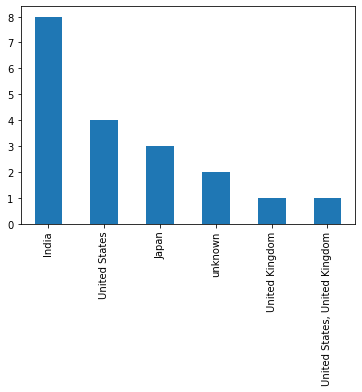

In [78]:
pd.Series(cd).value_counts().plot(kind='bar');

In [79]:
cw = []
for c in top.index:
    cw.append(netflix[netflix['cast'].str.contains(c)]['listed_in'].unique()[0])

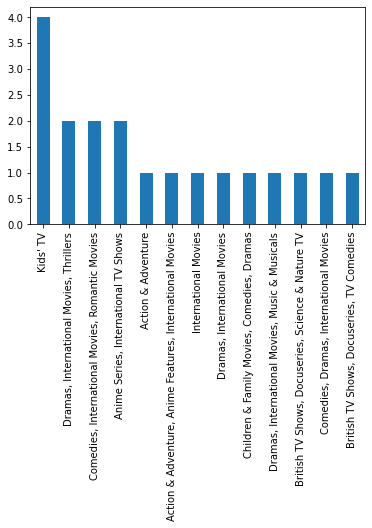

In [80]:
pd.Series(cw).value_counts().plot(kind='bar');

- out of the top 20 actors by the number of participations 12 from India (8) and US (4)
- Filmed in the Kids' TV genre 4 times

# Country

In [23]:
country = netflix['country']

In [24]:
country.isna().sum()

476

In [25]:
country.fillna('unknown',inplace=True)

In [28]:
lst1 = []
for i in range(len(country)):
    lst1.append(country[i].split(','))

In [29]:
b1 = []
for i in range(len(lst1)):
    b1.extend(lst1[i])

In [31]:
c1 = []
for i in range(len(b1)):
    c1.append(b1[i].strip(' '))
print(c1)

['United States', 'India', 'South Korea', 'China', 'United Kingdom', 'United States', 'United States', 'United States', 'Spain', 'Bulgaria', 'United States', 'Spain', 'Canada', 'Chile', 'United States', 'United States', 'United Kingdom', 'Denmark', 'Sweden', 'unknown', 'Netherlands', 'Belgium', 'United Kingdom', 'United States', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'France', 'Belgium', 'United States', 'France', 'Belgium', 'United States', 'Uruguay', 'United States', 'United States', 'United States', 'unknown', 'United States', '', 'unknown', 'Thailand', 'China', 'Canada', 'United States', 'United States', 'Belgium', 'United Kingdom', 'United States', 'Belgium', 'France', 'unknown', 'India', 'unknown', 'India', 'unknown', 'France', 'United States', 'India', 'United Kingdom', 'United Kingdom', 'unknown', 'United States', 'Canada', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'United States', 'United States', 'United Stat

In [32]:
country_count = pd.Series(country)

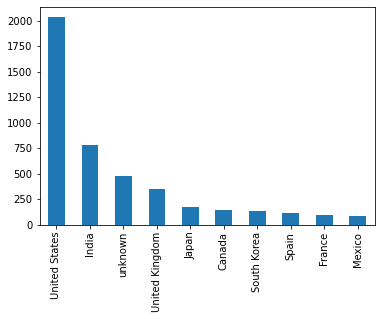

In [35]:
country_count.value_counts().head(10).plot(kind='bar')

- Approximately ~2000 shots in the US, then ~750 in India, showing them as major content producers

# Type

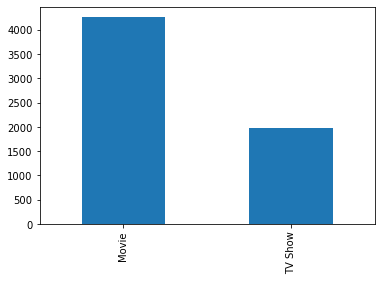

In [49]:
netflix['type'].value_counts().plot(kind='bar')

- Movie section (>4000) twice as big as TV Show (~2000)

# Year

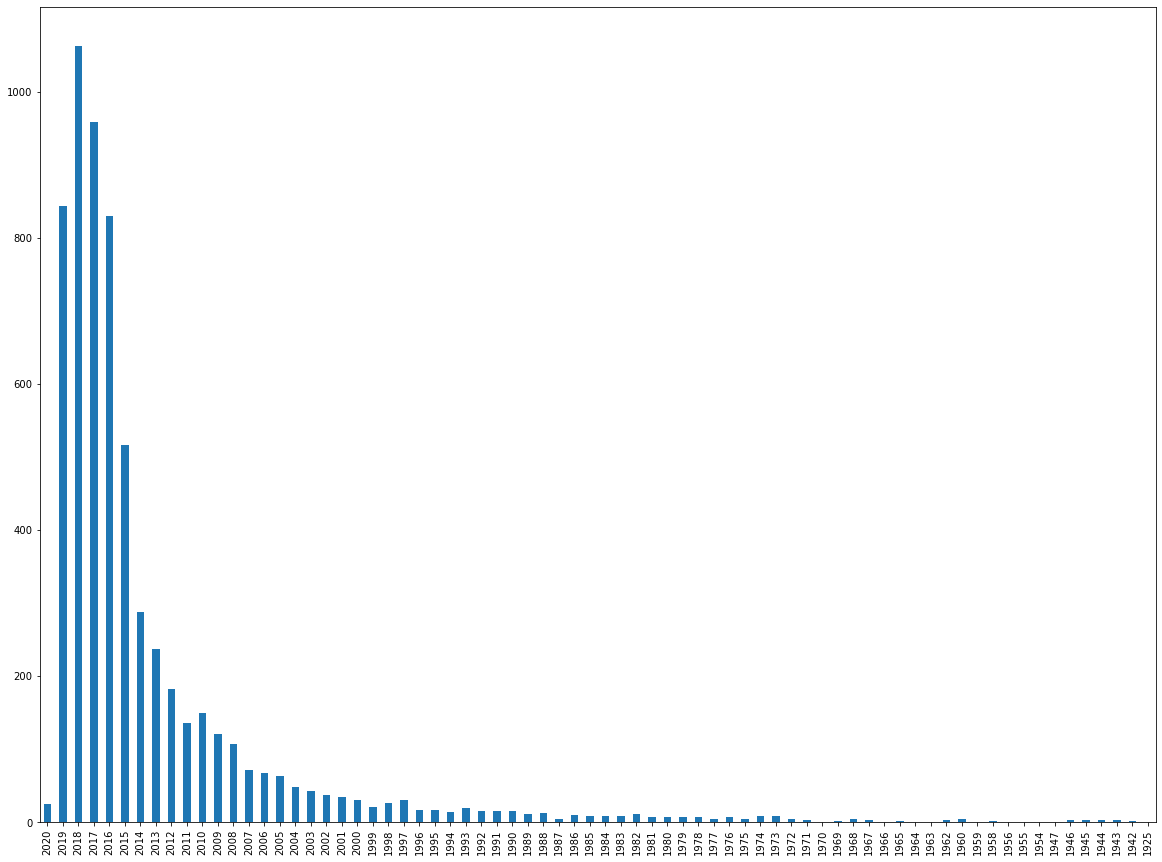

In [51]:
fig = plt.figure(figsize = (20, 15))
ax = netflix['release_year'].value_counts().sort_index(ascending=False).plot(kind='bar')

- 2018 is the most productive year in terms of content production >1000
- it can be seen that from year to year the amount of content increased, but after 2018 it decreased, perhaps COVID was the culprit
- abnormally low 2020 could be explained by the peak of COVID restrictions or collected data does not cover until the end of 2020

# Country by years

In [54]:
!pip install squarify
import squarify

In [58]:
def treemap_by_year(year):
    a = netflix[netflix['release_year'] == year]['country'].value_counts().head(10)
    fig = plt.figure(figsize = (10, 10))
    b = squarify.plot(sizes=a,label=a.index)
    plt.axis('off')
    plt.show()
    return b

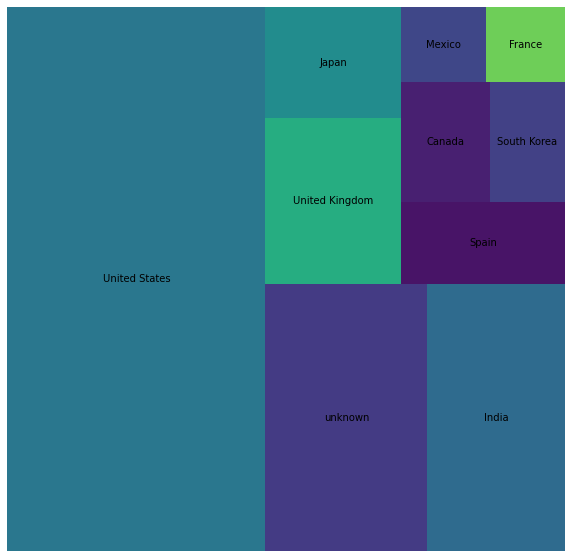

In [85]:
treemap_by_year(year=2018);

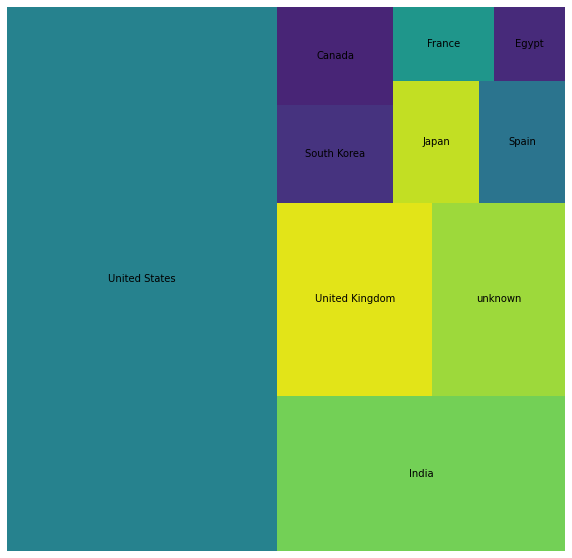

In [87]:
treemap_by_year(year=2017);

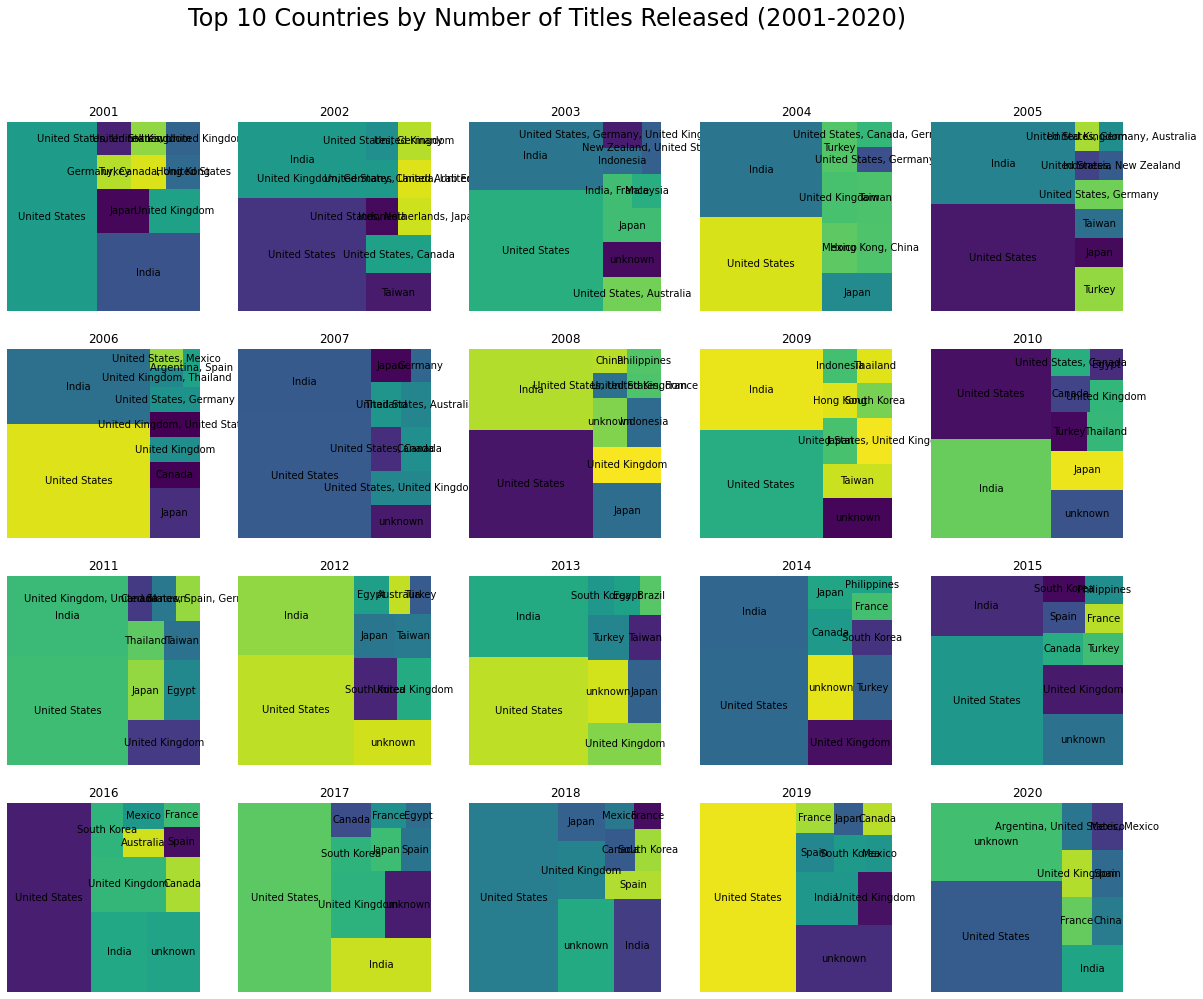

In [61]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

for i, year in enumerate(range(2001, 2021)):
    a = netflix[netflix['release_year'] == year]['country'].value_counts().head(10)
    squarify.plot(sizes=a, label=a.index, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(str(year))

for ax in axes.flatten():
    ax.axis('off')
fig.suptitle('Top 10 Countries by Number of Titles Released (2001-2020)', fontsize=24);

- in the top 2 by years: 2017 and 2018 we see that US occupies almost half of the content
- Over the past 20 years: 2001-2020, we see that until 2014 India produced as much as the US, but after the US reached half of all content

# Genre by years

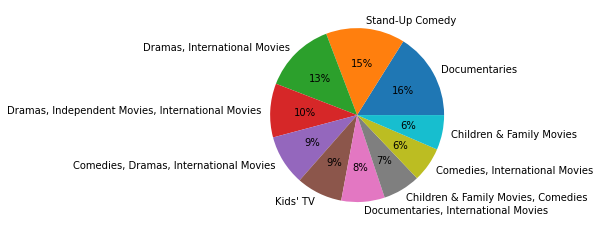

In [57]:
listed_in = netflix['listed_in'].value_counts().head(10)
plt.pie(listed_in, labels = listed_in.index, autopct='%.0f%%');

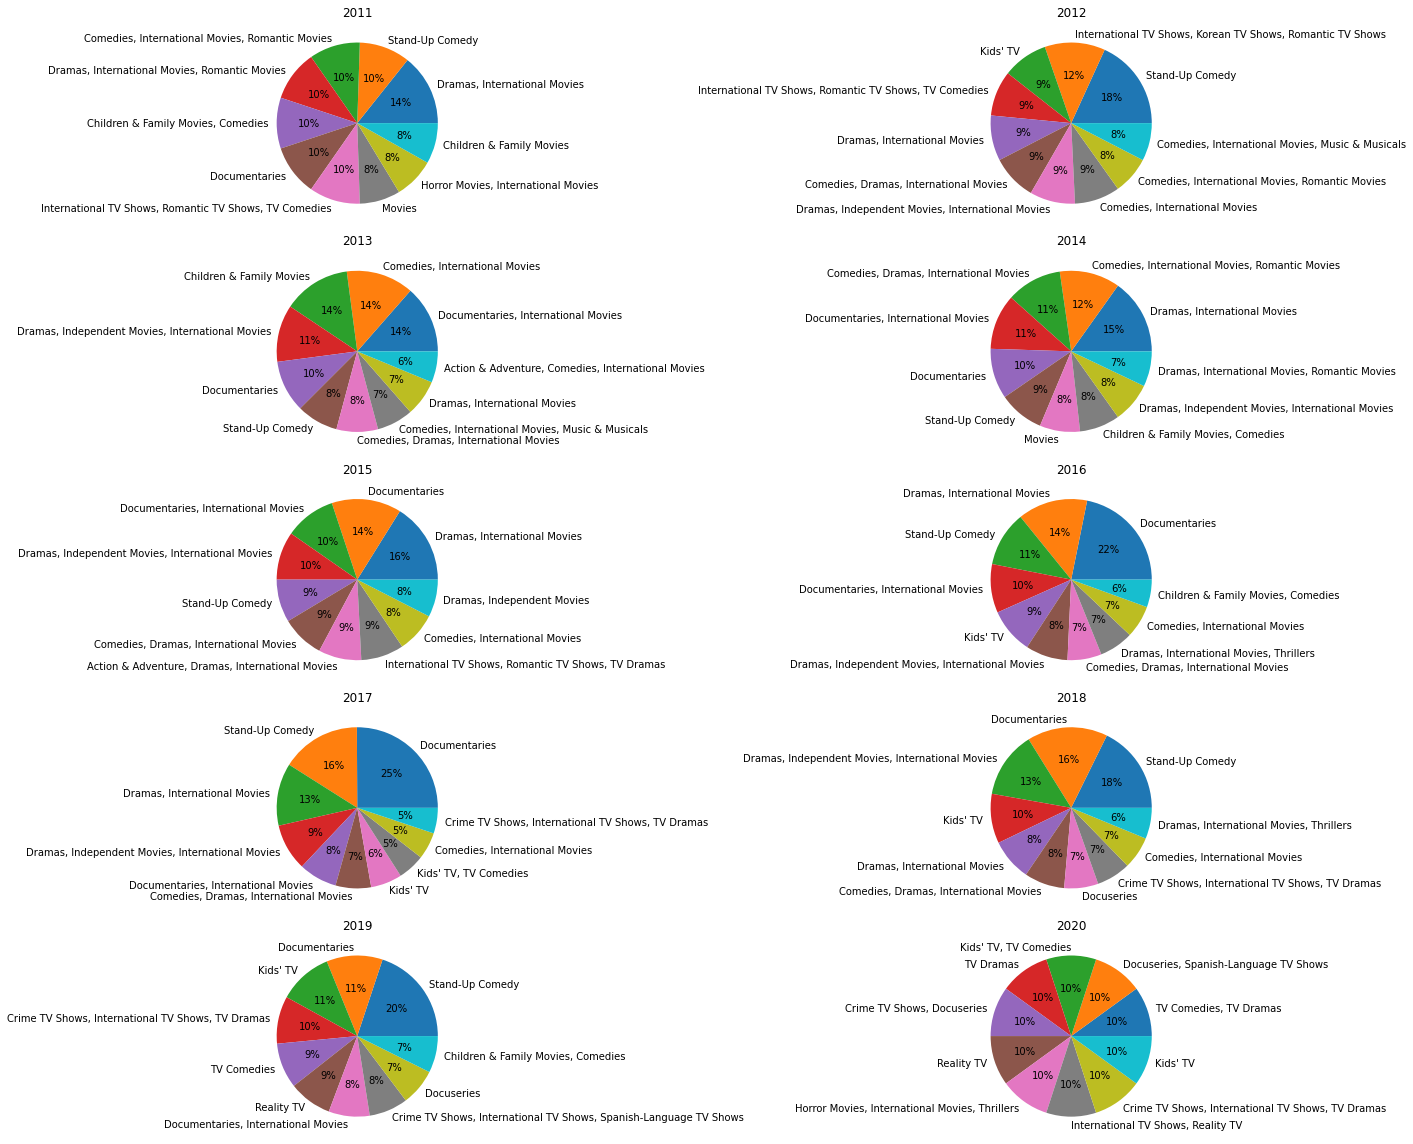

In [71]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 16))

for i, year in enumerate(range(2011, 2021)):
    data = netflix[netflix['release_year'] == year]['listed_in'].value_counts().head(10)
    
    row_idx = i // 2
    col_idx = i % 2
    
    axs[row_idx, col_idx].pie(data, labels=data.index, autopct='%.0f%%')
    axs[row_idx, col_idx].set_title(str(year))

fig.tight_layout()
plt.show()


In [88]:
len(netflix[netflix['release_year'] == 2020][['listed_in','type']])

25

- Only 25 content released in 2020
- Top 3 in total by genre: Documentaries(16%), Stand-Up comedy(15%), Dramas, International Movies(13%)
- 2011-2020: Almost every year you can see that 2 from Documentaries, Stand-Up comedy, Dramas, International Movies have always been on top in the top
- Of the anomalous, Documentaries (25%, 22%) in 2017, 2016 and Stand-Up Comedy (20%) in 2019 can be noted

## Summary
- India and USA are major content producers
- Actors from India are the most filmed
- Twice as many films as series
- Content production increased every year except for COVID year
- Most filmed in the genres of Documentaries, Stand-Up comedy, Dramas, International Movies